In [42]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def show_imgs(imgs_dict:dict, ncol=0, dpi=200, font_scale=0.3, max_text_size=30, put_title=True):
    font_size = int(plt.rcParams["font.size"]*font_scale)

    if ncol > 0:
        nrow = ((len(imgs_dict)-1)//ncol)+1
    else:
        nrow = 1
        ncol = len(imgs_dict)

    img_num = len(imgs_dict)
    fig = plt.figure(figsize=(float(img_num), float(img_num)), dpi=dpi)
    grid = ImageGrid(fig, 111, nrows_ncols=(nrow, ncol), axes_pad=0.2,)

    for i in range(nrow*ncol):
        grid[i].axis('off')
        if i < len(imgs_dict):
            img_key = list(imgs_dict.keys())[i]
            grid[i].imshow(imgs_dict[img_key][:,:,::-1])
            
            # img_keyの文字列がmax_text_sizeを超える場合は、改行する
            # ただし、文字列内に"\n"が含まれている場合は、改行しない
            if len(str(img_key)) > max_text_size:
                if "\n" not in str(img_key):
                    img_key = "\n".join([img_key[i:i+max_text_size] for i in range(0, len(img_key), max_text_size)])
            
            if put_title:
                grid[i].set_title(img_key, fontsize=font_size, color='black', pad=int(font_size/2))
    
    plt.show(); plt.close()
    return None



def image_diff(img1, img2):
    
    def tofloat32(img): return (img/255.).astype(np.float32)
    def touint8(img):   return np.clip(img*255, a_min = 0, a_max = 255).astype(np.uint8)

    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # グレイスケールにする
    if len(img1.shape) == 3:
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    if len(img2.shape) == 3:
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    img1f = tofloat32(img1)
    img2f = tofloat32(img2)
    diff = img2f - img1f
    
    # img1 <= img2（明るくなった部分）のマスク
    mask_img1_lesser_img2 = cv2.cvtColor(
        np.where(diff >= 0, 1, 0).astype(np.float32),
        cv2.COLOR_GRAY2BGR
    )
    # img1 > img2（暗くなった部分）のマスク
    mask_img1_greater_img2 = cv2.cvtColor(
        np.where(diff < 0, 1, 0).astype(np.float32),
        cv2.COLOR_GRAY2BGR
    )

    # img1 <= img2の着色
    result1 = cv2.multiply(
        np.dstack((img1f, img1f, img1f+diff)),
        mask_img1_lesser_img2
    )

    # img1 > img2の着色
    result2 = cv2.multiply(
        np.dstack((img1f, img1f+diff, img1f+diff)),
        mask_img1_greater_img2
    )

    res = touint8(result1 + result2)

    return res



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


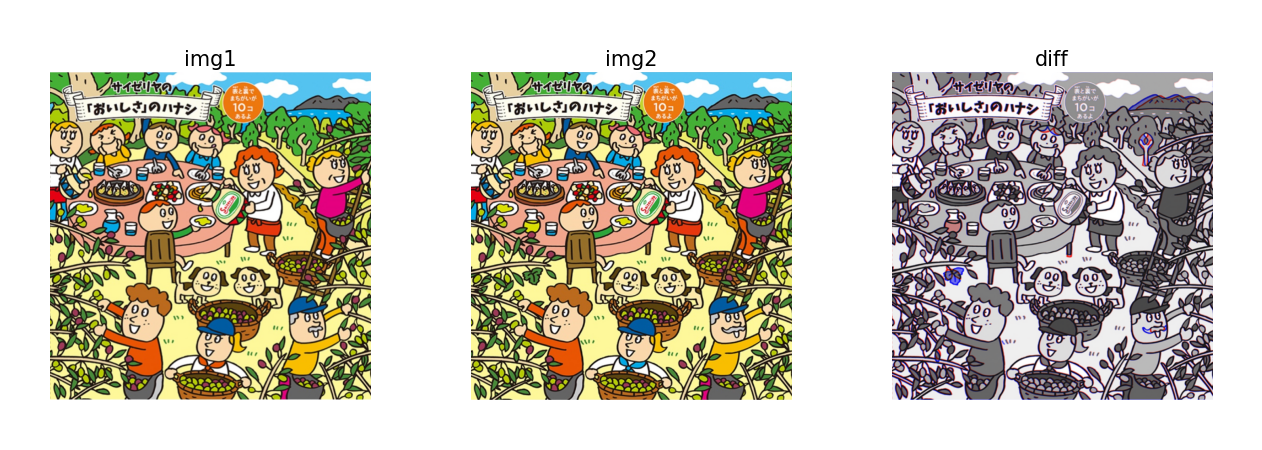

In [44]:
img1 = cv2.imread('../../sample_data/saize_diff/Saizeriya_1.jpg')
img2 = cv2.imread('../../sample_data/saize_diff/Saizeriya_2.jpg')

imgs = {
    'img1': img1,
    'img2': img2,
    'diff': image_diff(img1, img2),
}

show_imgs(imgs, dpi=500)

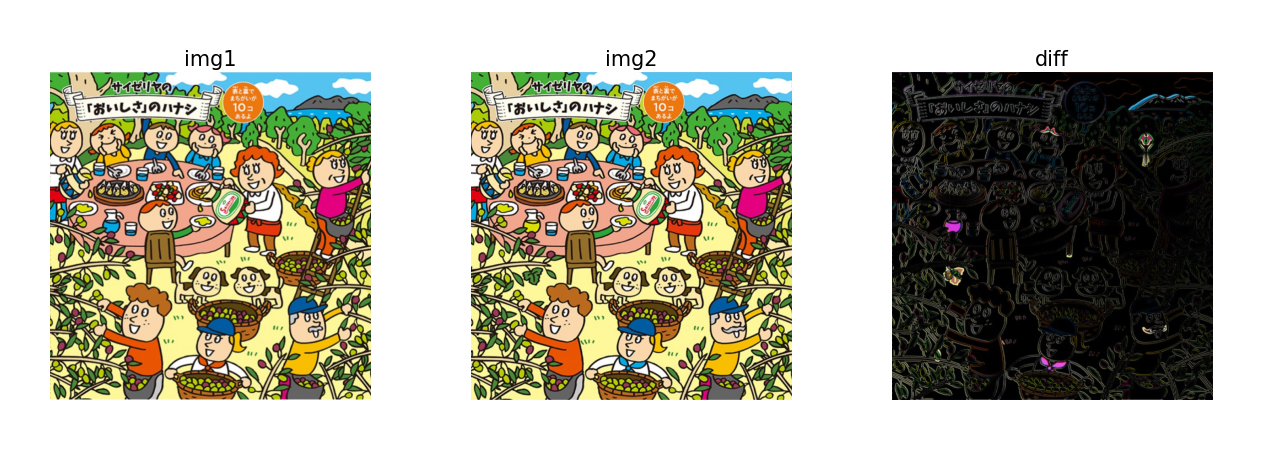

In [50]:
from PIL import Image, ImageChops

img1 = cv2.imread('../../sample_data/saize_diff/Saizeriya_1.jpg')
img2 = cv2.imread('../../sample_data/saize_diff/Saizeriya_2.jpg')

imgs = {
    'img1': img1,
    'img2': img2,
    'diff': np.array(ImageChops.difference(Image.fromarray(img1), Image.fromarray(img2))),
}

show_imgs(imgs, dpi=500)